# Image Manipulation in BART

In this notebook we will explore BART's capacity for image manipulation.

In [1]:
bart

BART. Available commands are:
avg         bench       bitmask     cabs        caldir      calmat      
carg        casorati    cc          ccapply     cdf97       circshift   
conj        conv        copy        cpyphs      creal       crop        
delta       ecalib      ecaltwo     estdelay    estdims     estshift    
estvar      extract     fakeksp     fft         fftmod      fftrot      
fftshift    filter      flatten     flip        fmac        homodyne    
index       invert      itsense     join        looklocker  lrmatrix    
mandelbrot  mip         moba        nlinv       noise       normalize   
nrmse       nufft       ones        pattern     phantom     pics        
pocsense    poisson     poly        repmat      reshape     resize      
rof         rss         sake        saxpy       scale       sdot        
show        slice       spow        sqpics      squeeze     std         
svd         tgv         threshold   toimg       traj        transpose   
twixread    var      

: 1

## Utilities

The following function displays images such that we can view the results of our work

In [3]:
# BASH function to write BART file to png,
# display the png, and then temove it
function imshow () {
    bart toimg -W $1 $1
    cat $1.png | display
    rm $1.png
}

## Generating a Phantom

We will be performing initial manipulations on a Shepp-Logan numerical phantom. A phantom can be generated using the `phantom` command.

In [5]:
bart phantom -h

Usage: phantom [-s d] [-S d] [-k] [-t <string>] [-G ...] [-T ...] [-x d] [-g d] [-3] [-b] <output>

Image and k-space domain phantoms.

-s nc      	nc sensitivities
-S nc      	Output nc sensitivities
-k		k-space
-t file      	trajectory
-G		geometric object phantom
-T		tubes phantom
-x n      	dimensions in y and z
-g n=1,2      	select geometry for object phantom
-3		3D
-b		create basis for geometry
-h		help


### Shepp-Logan Phantom and Parameters

In [1]:
bart phantom -x 256 shepp_logan

We use `-x` to specify the dimension

Writing 1 image(s)...done.


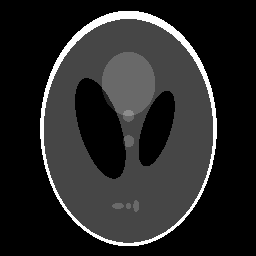

In [4]:
imshow shepp_logan

We can also generate the phantom in K-Space, using the `-k` flag.

Writing 1 image(s)...done.


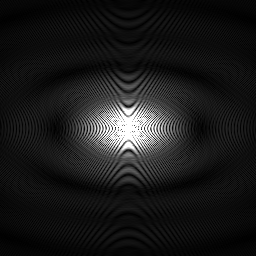

In [5]:
bart phantom -x 256 -k shepp_logan_k_space

imshow shepp_logan_k_space

Now we will reconstruct the phantom from K-space using an inverse Fast Fourier Transform: `fft` with the `-i` flag. As an interesting aside, note the artifacts in the reconstructed phantom (it loses some of 'crispness' of the original image - pictured second) due to floating point error.

Writing 1 image(s)...done.


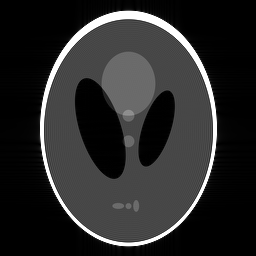

Writing 1 image(s)...done.


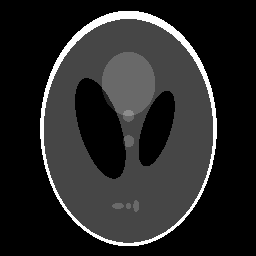

In [6]:
bart fft -i $(bart bitmask 0 1) shepp_logan_k_space reconstructed_phantom
imshow reconstructed_phantom
imshow shepp_logan

### Alternative K-Space Trajectories

`bart traj` allows us to specify and parameterize alternate K-Space sampling trajectories. By default, BART generates K-Space phantoms with a Cartesian sampling trajectory. We are going to generate a radial sampling trajectory and generate a K-space phantom with this trajectory 

In [7]:
bart traj -h

Usage: traj [-x d] [-y d] [-a d] [-t d] [-m d] [-l] [-g] [-r] [-G] [-H] [-s d] [-D] [-R f] [-q ...] [-Q ...] [-O] [-3] [-c] [-z ...] [-C <string>] <output>

Computes k-space trajectories.

-x x      	readout samples
-y y      	phase encoding lines
-a a      	acceleration
-t t      	turns
-m mb      	SMS multiband factor
-l		aligned partition angle
-g		golden angle in partition direction
-r		radial
-G		golden-ratio sampling
-H		halfCircle golden-ratio sampling
-s # Tiny GA      	tiny golden angle
-D		projection angle in [0,360°), else in [0,180°)
-R phi      	rotate
-q delays      	gradient delays: x, y, xy
-Q delays      	(gradient delays: z, xz, yz)
-O		correct transverse gradient error for radial tajectories
-3		3D
-c		asymmetric trajectory [DC sampled]
-z Ref:Acel      	Undersampling in z-direction.
-C file      	custom_angle file [phi + i * psi]
-h		help


Reconstruction-focused tutorials will explore the extent to which we can generate sampling trajectories. Of note here is the `-r` flag, which specifies a radial trajectory, and `-x` and `-y` which indicate the number of readout samples and phase encoding lines, respectively.

WARN: size ignored.
Writing 1 image(s)...done.


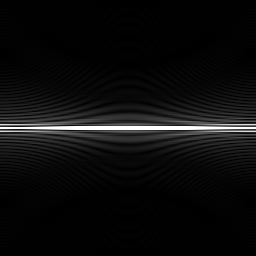

In [17]:
bart traj -x 256 -y 256 -r radial_trajectory
bart phantom -x 256 -k -t radial_trajectory radial_phantom

imshow radial_phantom

### Geometric Object and Tubes Phantoms

We can also generate geometric and tube phantom. They are parameterized the same way as the Shepp-Logan phantom. Note that the geometric object phantom allows you to specify different geometries with the `-g` flag.

In [4]:
bart phantom -h

Usage: phantom [-s d] [-S d] [-k] [-t <string>] [-G ...] [-T ...] [-x d] [-g d] [-3] [-b] <output>

Image and k-space domain phantoms.

-s nc      	nc sensitivities
-S nc      	Output nc sensitivities
-k		k-space
-t file      	trajectory
-G		geometric object phantom
-T		tubes phantom
-x n      	dimensions in y and z
-g n=1,2      	select geometry for object phantom
-3		3D
-b		create basis for geometry
-h		help


Writing 1 image(s)...done.


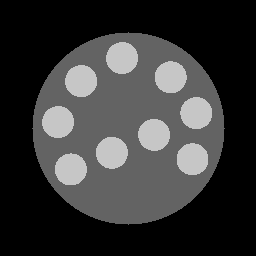

In [7]:
bart phantom -T -x 256 tubes_phantom
imshow tubes_phantom

Writing 1 image(s)...done.


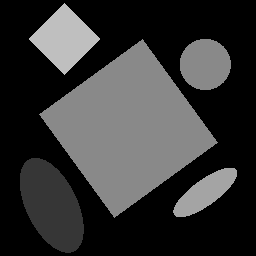

Writing 1 image(s)...done.


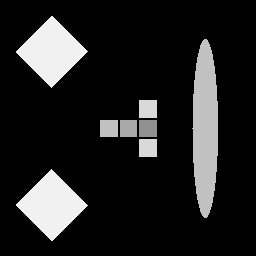

In [8]:
bart phantom -G -g 1 -x 256 geom_1
imshow geom_1

bart phantom -G -g 2 -x 256 geom_2
imshow geom_2

### 3D Phantoms

We can also generate 3D Phantoms with BART.

In [19]:
bart phantom -3 -x 256 shepp_logan_3d

#### **TODO: 3D Image Display Here**

We'll take a few slices of the 3D Phantom to display inline:

Writing 1 image(s)...done.


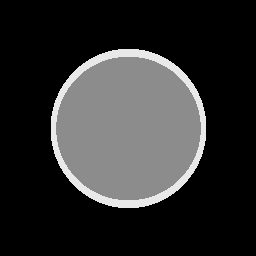

Writing 1 image(s)...done.


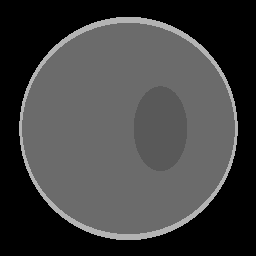

Writing 1 image(s)...done.


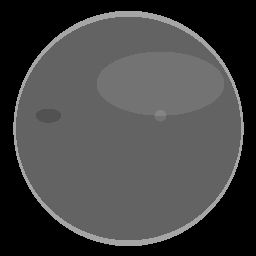

Writing 1 image(s)...done.


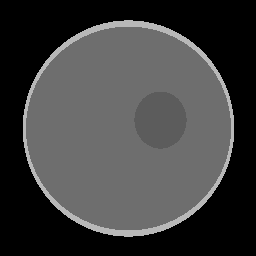

Writing 1 image(s)...done.


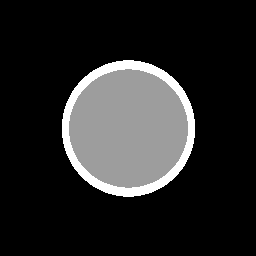

In [20]:
bart extract 1 63 64 shepp_logan_3d slice_0
bart extract 1 100 101 shepp_logan_3d slice_1
bart extract 1 127 128 shepp_logan_3d slice_2
bart extract 1 163 164 shepp_logan_3d slice_3
bart extract 1 200 201 shepp_logan_3d slice_4

imshow slice_0
imshow slice_1
imshow slice_2
imshow slice_3
imshow slice_4

## Averaging Across Dimensions

We can use `bart avg` to take the average across specified dimensions

In [17]:
bart avg -h

Usage: avg [-w] <bitmask> <input> <output>

Calculates (weighted) average along dimensions specified by bitmask.

-w		weighted average
-h		help


We use the `bitmask` command to specify dimensions to average over. We are going to calculate weighted averages for the 3D phantom we generated earlier.

Writing 1 image(s)...done.


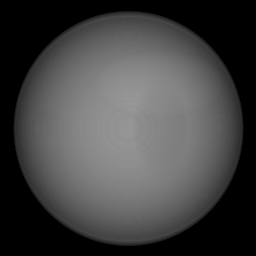

In [11]:
bart avg $(bart bitmask 1) shepp_logan_3d shepp_logan_avg

imshow shepp_logan_avg

We can use the `-w` flag to take a weighted average.

Writing 1 image(s)...done.


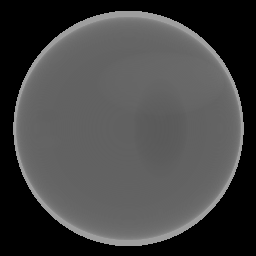

In [12]:
bart avg -w $(bart bitmask 1) shepp_logan_3d shepp_logan_avg

imshow shepp_logan_avg

Compare these averages to the 3D phantom generated earlier.

## Maximum Intensity Projection

Similarly, `bart mip` allows us to perform a maximum intensity projection across a specified dimension

In [91]:
bart mip -h

Usage: mip [-m] [-a] bitmask <input> <output>

Maximum (minimum) intensity projection (MIP) along dimensions specified by bitmask.


-m		minimum
-a		do absolute value first
-h		help


`-m` toggles minimum intensity projection. In the first example, we perform a maximum intesity projection. In the second, we use the `-m` flag and perform a minimum intensity projection. 

Writing 1 image(s)...done.


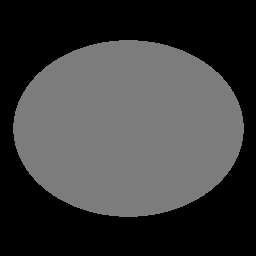

In [14]:
bart mip $(bart bitmask 0) shepp_logan_3d shepp_logan_mip

imshow shepp_logan_mip

Writing 1 image(s)...done.


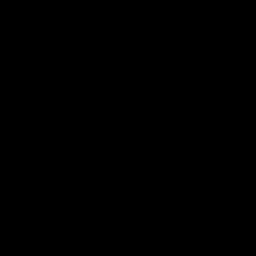

In [17]:
bart mip -m $(bart bitmask 0) shepp_logan_3d shepp_logan_mip

imshow shepp_logan_mip

In the second example, note that the minimum intensity of the black pixels dominates the projection

## Median Filtering

The `bart filter` tool applies a simple median filter of length `len` along `dim`

In [18]:
bart filter -h

Usage: filter [-m d] [-l d] <input> <output>

Apply filter.


-m dim      	median filter along dimension dim
-l len      	length of filter
-h		help


the `-m` and `-l` flags are necessary, and the length must be > 0

In [11]:
bart filter -m 0 -l 10 shepp_logan filter_test

Writing 1 image(s)...done.


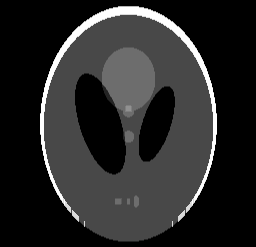

In [12]:
imshow filter_test

In [8]:
bart version

v0.4.02


By changing the `-m` flag, we can modify the dimension along which the filter is applied

Writing 1 image(s)...done.


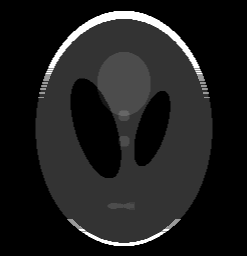

In [47]:
bart filter -m 1 -l 10 shepp_logan shepp_logan_filtered_1

imshow shepp_logan_filtered_1

Below, we increase the length of the filter by modifying the `-l` flag:

Writing 1 image(s)...done.


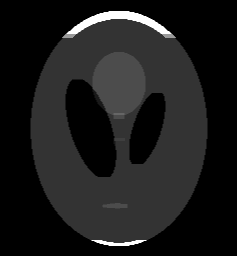

In [48]:
bart filter -m 1 -l 20 shepp_logan shepp_logan_filtered_2

imshow shepp_logan_filtered_2

## Convolution

BART also features a built in convolution tool, `bart conv`. We will create a simple moving average filter and convolve it with the image

In [27]:
bart ones 2 11 11 averager

bart show -m averager

Type: complex float
Dimensions: 16
AoD:	11	11	1	1	1	1	1	1	1	1	1	1	1	1	1	1


The `ones` tool creates an array of specified dimensions (2) with each subsequent argument offering the size of that dimension (11 x 11). Note that the dimensions here must be odd 

#### **TODO: CLARIFY WHY DIMS MUST BE ODD**

In [28]:
bart conv -h

Usage: conv bitmask <input> <kernel> <output>

Performs a convolution along selected dimensions.

-h		help


Here again we employ the `bitmask` tool to specify the dimensions to convolve on. We will pass in our `averager` filter as the `kernel`. 

In [29]:
bart conv $(bart bitmask 0 1) shepp_logan averager shepp_logan_averaged

Writing 1 image(s)...done.


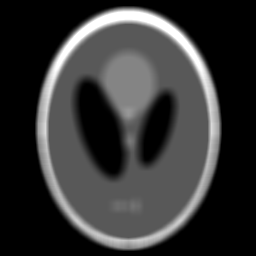

In [30]:
imshow shepp_logan_averaged

Observe the effect of the averaging filter on the image: the phantom now appears blurred.

We can also apply simpler, 1-dimensional filters. Shown here is the result of applying the one-dimensional filter across dimension `0`.

Writing 1 image(s)...done.


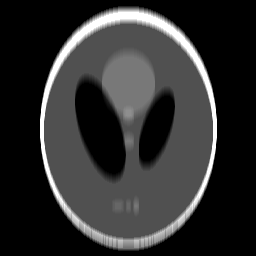

In [31]:
bart ones 1 11 one_dim_avg
bart conv $(bart bitmask 0) shepp_logan one_dim_avg shepp_logan_avg_1d
imshow shepp_logan_avg_1d

## Cropping, Resizing, and Flipping Images

BART offers standard image manipulation in the form of the `crop`, `resize`, and `flip` tools. 

In [7]:
bart crop -h

Usage: crop dimension size <input> <output>

Extracts a sub-array corresponding to the central part of {size} along {dimension}

-h		help


Writing 1 image(s)...done.


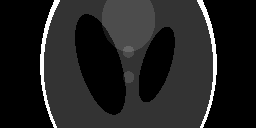

In [24]:
bart crop 0 128 shepp_logan cropped_phantom_0

imshow cropped_phantom_0

Writing 1 image(s)...done.


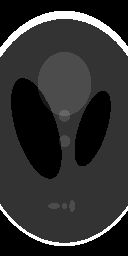

In [22]:
bart crop 1 128 shepp_logan cropped_phantom_1

imshow cropped_phantom_1

We can see how `crop` commands can be strung together to crop across multiple dimensions

Writing 1 image(s)...done.


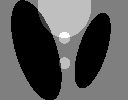

In [23]:
bart crop 1 128 cropped_phantom_0 cropped_phantom

imshow cropped_phantom

The `resize` allows for more general manipulation of image dimensions

In [16]:
bart resize -h

Usage: resize [-c] dim1 size1 ... dimn sizen <input> <output>

Resizes an array along dimensions to sizes by truncating or zero-padding.

-c		center
-h		help


Each `dim` is paired with a respective `size`, allowing for eaching enlarging or cropping of images in one command. 

The previous example is shown below:

Writing 1 image(s)...done.


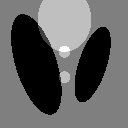

In [25]:
bart resize -c 0 128 1 128 shepp_logan resized_phantom

imshow resized_phantom

The `-c` flag centers the cropping. Without this flag, we crop to the corner

Writing 1 image(s)...done.


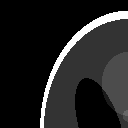

In [26]:
bart resize 0 128 1 128 shepp_logan resized_phantom
imshow resized_phantom

Next, we will enlarge the phantom. `crop` zero pads the image. 

Writing 1 image(s)...done.


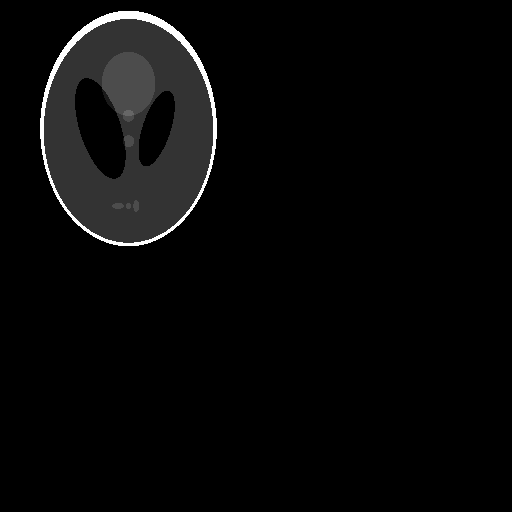

In [29]:
bart resize 0 512 1 512 shepp_logan enlarged_phantom
imshow enlarged_phantom

Writing 1 image(s)...done.


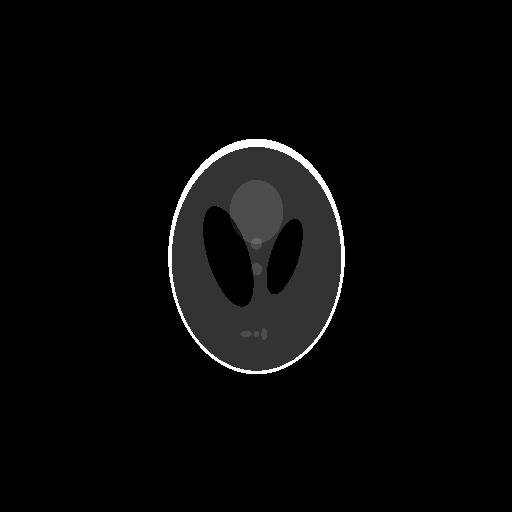

In [30]:
bart resize -c 0 512 1 512 shepp_logan enlarged_phantom
imshow enlarged_phantom

Th `flip` tool allows us to reverse an image's dimensions

In [32]:
bart flip -h

Usage: flip bitmask <input> <output>

Flip (reverse) dimensions specified by the {bitmask}.

-h		help


The following cells demonstrate flips along dimensions `0`, `1` and both

Writing 1 image(s)...done.


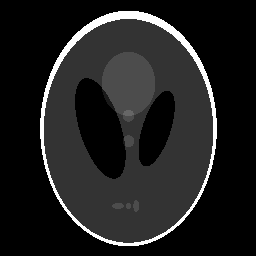

Writing 1 image(s)...done.


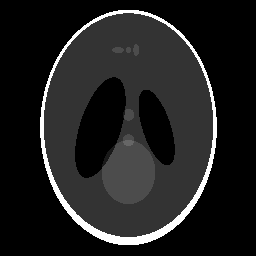

In [39]:
bart flip $(bart bitmask 0) shepp_logan flipped_phantom_0
imshow shepp_logan 
imshow flipped_phantom_0

Writing 1 image(s)...done.


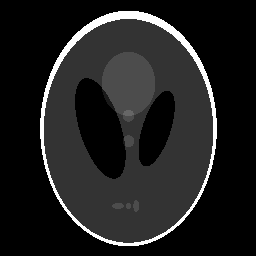

Writing 1 image(s)...done.


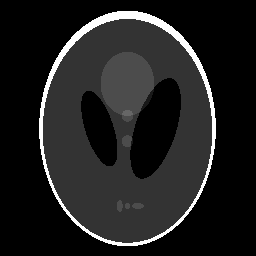

In [41]:
bart flip $(bart bitmask 1) shepp_logan flipped_phantom_1
imshow shepp_logan 
imshow flipped_phantom_1

Writing 1 image(s)...done.


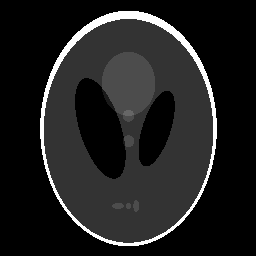

Writing 1 image(s)...done.


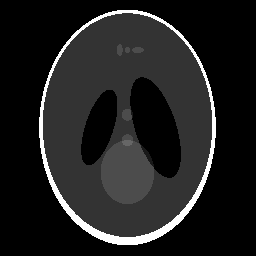

In [42]:
bart flip $(bart bitmask 0 1) shepp_logan flipped_phantom_01
imshow shepp_logan 
imshow flipped_phantom_01

## Inverting Images

The `invert` tool can be applied to images as well as arrays. When applied, it replaces each element with 1/ element

In [24]:
bart invert -h

Usage: invert <input> <output>

Invert array (1 / <input>). The output is set to zero in case of divide by zero.

-h		help


Here is an example on the tubes phantom:

Writing 1 image(s)...done.


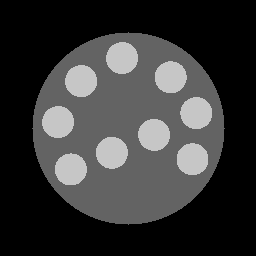

Writing 1 image(s)...done.


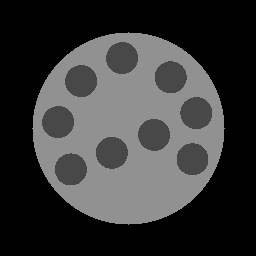

In [33]:
bart phantom -T -x 256 tubes
bart invert tubes inverted_tubes

imshow tubes
imshow inverted_tubes

## Generating Noisy Images

`bart noise` allows us to introduce noise to our images or arrays

In [49]:
bart noise -h

Usage: noise [-s d] [-r] [-n f] <input> <output>

Add noise with selected variance to input.

-s random seed initialization
-r		real-valued input
-n variance      	DEFAULT: 1.0
-h		help


Below, we generate noise with a seed of `10` (`-s` flag) and a variance of `1` (`-n`)

Writing 1 image(s)...done.


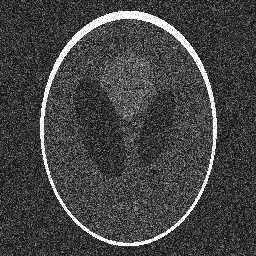

In [32]:
bart noise -s 10 -n 0.05 shepp_logan noisy_phantom

imshow noisy_phantom

## Thresholding

Finally, we will demonstrate some of BART's thresholding capabilities.

In [115]:
bart threshold -h

Usage: threshold [-H ...] [-W ...] [-L ...] [-D ...] [-j d] [-b d] lambda <input> <output>

Perform (soft) thresholding with parameter lambda.

-H		hard thresholding
-W		daubechies wavelet soft-thresholding
-L		locally low rank soft-thresholding
-D		divergence-free wavelet soft-thresholding
-j bitmask      	joint soft-thresholding
-b blocksize      	locally low rank block size
-h		help


By default, `threshold` performs soft thresholding with some parameter lambda. We can use `-H` to toggle hard thresholding. For some parameter $\lambda$ and wavelet coefficient $d$, the difference between the results of hard and soft thresholding is as follows:

$$
D_{\text{hard}}\left(d | \lambda \right) = \begin{cases} 
0 & |d| \leq \lambda \\
d & |d| > \lambda
\end{cases}
$$

$$
D_{\text{hard}}\left(d | \lambda \right) = \begin{cases} 
0 & |d| \leq \lambda \\
d - \lambda & d > \lambda \\
d + \lambda & d < -\lambda 
\end{cases}
$$

[source](https://dsp.stackexchange.com/questions/15464/wavelet-thresholding)

Let's explore the effects of these methods on the Shepp-Logan Phantom

Writing 1 image(s)...done.


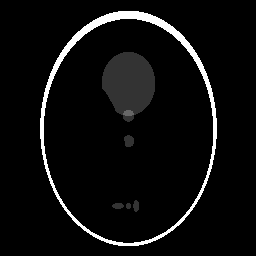

In [55]:
bart threshold 0.2 shepp_logan threshold_test

imshow threshold_test

Writing 1 image(s)...done.


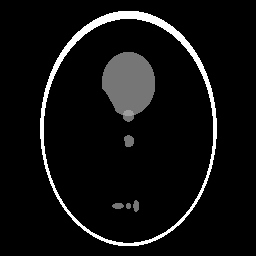

In [54]:
bart threshold -H 0.2 shepp_logan hard_threshold_test

imshow hard_threshold_test

We can observe the effects of hard thresholding's sharper cutoff in the second image: the contrast between areas of high and low intensities is much more distinct. 